In [1]:
import collections
import random
from pathlib import Path

import tensorflow as tf
import pandas as pd
from PIL import Image

from datasetinsights.datasets import GoogleGroceriesReal, GroceriesReal
from datasetinsights.io import BBox2D
from datasetinsights.stats import bar_plot, histogram_plot, plot_bboxes

In [2]:
data_root = str(Path.home() / "data")

In [3]:
# Google GroceriesReal has 400 images in train split, 214 images in test split
goog_groceries_train = GoogleGroceriesReal(data_root=data_root, split="train")
goog_groceries_test = GoogleGroceriesReal(data_root=data_root, split="test")

# Unity GroceriesReal has x images in train split, y images in test split
unity_groceries_train = GroceriesReal(data_root=data_root, split="train")
unity_groceries_test = GroceriesReal(data_root=data_root, split="test")

/Users/youcyuan/miniconda3/envs/dins-dev/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/youcyuan/miniconda3/envs/dins-dev/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts

### plot a random iamge from the dataset

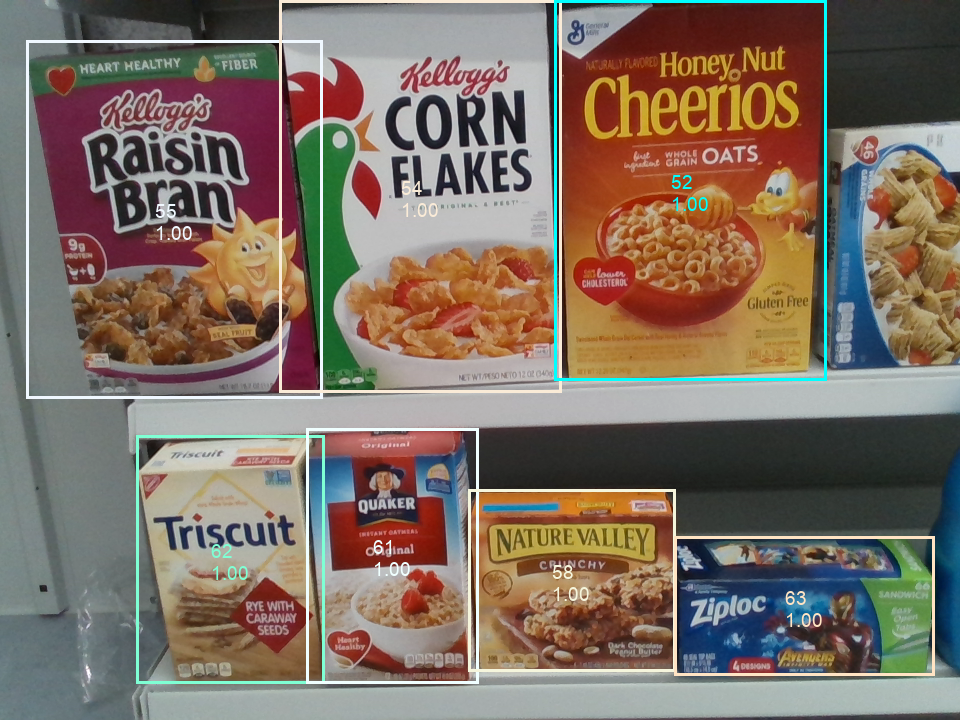

In [4]:
data = goog_groceries_test
index = random.randrange(len(data))
image, bboxes = data[index]
plot_bboxes(image, bboxes, box_line_width=3)

In [5]:
goog_boxes_train = [bboxes for _, bboxes in goog_groceries_train]
goog_boxes_test = [bboxes for _, bboxes in goog_groceries_test]
unity_boxes_train = [bboxes for _, bboxes in unity_groceries_train]
unity_boxes_test = [bboxes for _, bboxes in unity_groceries_test]

### total object count

In [6]:
def total_count(datasets):
    dfs = []
    for dataset, data in datasets.items():
        ct = collections.Counter(box.label for boxes in data for box in boxes)
        df = pd.DataFrame.from_records(list(ct.items()), columns=["label_id", "count"])
        df["dataset"] = dataset
        dfs.append(df)
    
    return pd.concat(dfs)

In [7]:
datasets = {
    "google train": goog_boxes_train,
    "google test": goog_boxes_test,
}
bar_plot(
    total_count(datasets), x="label_id", y="count", facet_col="dataset",
    title="total object count in google groceriesreal datastes",
    x_title="label_id", y_title="count"
)

In [8]:
datasets = {
    "unity train": unity_boxes_train,
    "unity test": unity_boxes_test,
}
bar_plot(
    total_count(datasets), x="label_id", y="count", facet_col="dataset",
    title="total object count in unity groceriesreal datastes",
    x_title="label_id", y_title="count"
)

### number of bounding boxes per image

In [9]:
def per_image_count(datasets):
    dfs = []
    for dataset, data in datasets.items():
        num_boxes = [len(img_box) for img_box in data] 
        df = pd.DataFrame({"x": num_boxes})
        df["dataset"] = dataset
        dfs.append(df)
    
    return pd.concat(dfs)

In [10]:
datasets = {
    "google train": goog_boxes_train,
    "google test": goog_boxes_test,
}
histogram_plot(
    per_image_count(datasets), x="x", color="dataset", barmode="group", histnorm="probability density",
    title="GroceriesReal Dataset number of bounding boxes per image (google train vs test)",
    x_title="number of bounding boxes per image",
    y_title="frequency"
)

In [11]:
datasets = {
    "unity train": unity_boxes_train,
    "unity test": unity_boxes_test,
}
histogram_plot(
    per_image_count(datasets), x="x", color="dataset", barmode="group", histnorm="probability density",
    title="GroceriesReal Dataset number of bounding boxes per image (unity train vs test)",
    x_title="number of bounding boxes per image",
    y_title="frequency"
)

In [12]:
datasets = {
    "google test": goog_boxes_test,
    "unity test": unity_boxes_test,
}
histogram_plot(
    per_image_count(datasets), x="x", color="dataset", barmode="group", histnorm="probability density",
    title="GroceriesReal Dataset number of bounding boxes per image (google test vs unity test)",
    x_title="number of bounding boxes per image",
    y_title="frequency"
)

### bounding box sizes

size = sqrt(pixele_in_bounding_box / image pixels)

In [13]:
import math

RESOLUTIONS = {
    "unity train": 5184*3456,
    "unity test": 5184*3456,
    "google train": 960*720,
    "google test": 960*720 
}

def box_size(datasets):
    dfs = []
    for dataset, data in datasets.items():
        box_areas = [box.area for boxes in data for box in boxes]
        df = pd.DataFrame({"area": box_areas})
        df["size"] = (df["area"] / RESOLUTIONS[dataset]).apply(math.sqrt) 
        df["dataset"] = dataset
        dfs.append(df)
    
    return pd.concat(dfs)

In [14]:
datasets = {
    "google train": goog_boxes_train,
    "google test": goog_boxes_test,
}
histogram_plot(
    box_size(datasets), x="size", color="dataset", barmode="group", histnorm="probability density",
    title="Bouding box sizes (google train vs test)",
    x_title="size",
    y_title="frequency"
)

In [15]:
datasets = {
    "unity train": unity_boxes_train,
    "unity test": unity_boxes_test,
}
histogram_plot(
    box_size(datasets), x="size", color="dataset", barmode="group", histnorm="probability density",
    title="Bouding box sizes (unity train vs test)",
    x_title="size",
    y_title="frequency"
)

In [16]:
datasets = {
    "google test": goog_boxes_test,
    "unity test": unity_boxes_test,
}
histogram_plot(
    box_size(datasets), x="size", color="dataset", barmode="group", histnorm="probability density",
    title="Bouding box sizes (google test vs unity test)",
    x_title="size",
    y_title="frequency"
)

### Notes

GoogleGroceriesReal bounding box per image count is mean=4 for train and mean=8 for test

In [17]:
goog_groceries_train.label_mappings

{1: 'wasa_light',
 2: 'manner',
 3: 'tempo',
 4: 'regina',
 5: 'brandt',
 6: 'koelln_klassik',
 7: 'corny',
 8: 'koelln_schoko',
 9: 'grisini',
 10: 'bahlsen',
 11: 'bioknusper',
 12: 'pringls_orgwm',
 13: 'prinzenrolle',
 14: 'chips_ungarisch',
 15: 'rafaello',
 16: 'milka_cake',
 17: 'koelln_porridge',
 18: 'lindt_mini',
 19: 'soft_easy',
 20: 'elkos',
 21: 'duft',
 22: 'puderzucker',
 23: 'minikaramel',
 24: 'gutshaus',
 25: 'melitta',
 26: 'allnatura_chips',
 27: 'elkos_duowatte',
 28: 'apfelsaft',
 29: 'walker',
 30: 'nivea_body',
 31: 'yellow_candle',
 32: 'almdudler',
 33: 'segafredo',
 34: 'magnesium_kalium',
 35: 'milka_naps',
 36: 'nivea_aftersun',
 37: 'chocolate_chips',
 38: 'edeka_muellbaeutel',
 39: 'colgate',
 40: 'salzstangen',
 41: 'sugo',
 42: 'doppelherz_haut',
 43: 'duplo',
 44: 'maultaschen',
 45: 'magnesium_nacht',
 46: 'haussocke',
 47: 'heitmann',
 48: 'raid',
 51: 'capn_crunch_original',
 52: 'honey_nut_cheerios',
 53: 'kashi_dark_chocolate_coconut',
 54: 'kell